# Notebook for tSNE development

In [1]:
import os
import sys
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors, cm

from dpet.analysis import EnsembleAnalysis
from dpet.logger import stream as st

# Load data

In [2]:
# Codes.
ens_codes = [
    "3a1g_B_prod_R1_fit",
    "3a1g_B_prod_R2_fit",
    "3a1g_B_prod_R3_fit"
]

# Instantiate the pipeline object.
pipeline = EnsembleAnalysis()

# Load some data.
data_dp = "/home/giacomo/projects/ensemble_analysis/git/EnsembleTools/ensemble_files/3a1g_B"
pipeline.load_ensembles(
    input_dp=data_dp,
    codes=ens_codes,
    format="traj",
    topology_fp=os.path.join(data_dp, "3a1g_B.pdb"),  # Not needed when format="pdb".
    ext="xtc"
)

st.write("Loaded ensembles with the following codes:", pipeline.codes)

Loading data for 3a1g_B_prod_R1_fit.
Found 200 conformations.
Loading data for 3a1g_B_prod_R2_fit.
Found 200 conformations.
Loading data for 3a1g_B_prod_R3_fit.
Found 200 conformations.
Loaded ensembles with the following codes: ['3a1g_B_prod_R1_fit', '3a1g_B_prod_R2_fit', '3a1g_B_prod_R3_fit']


# Featurization

In [3]:
# Featurization options.
featurization = "phi_psi"
featurization_params = {}

# featurization = "ca_dist"
# featurization_params = {"seq_sep": 2, "normalize": False}

pipeline.featurize(featurization=featurization,
                   params=featurization_params)

Featurizing the 3a1g_B_prod_R1_fit ensemble.
Featurized ensemble shape: (200, 78)
Featurizing the 3a1g_B_prod_R2_fit ensemble.
Featurized ensemble shape: (200, 78)
Featurizing the 3a1g_B_prod_R3_fit ensemble.
Featurized ensemble shape: (200, 78)


# Dimensionality reduction

In [4]:
reduce_dim_method = "tsne"
reduce_dim_params = {"perplexity_vals": [10, 50, 100], "circular": True}

reduce_dim = pipeline.dimensionality_reduction(
    method=reduce_dim_method,
    params=reduce_dim_params)

Performing dimensionality reduction on phi_psi data.
Input featurized ensemble shape: (600, 78)
Fitting...
tsne is your selected dimensionality reduction method!
tsne is running...
tsne file for the perplexity value of 10 is saved in /tmp/tmp_5i4pvpr 
tsne file for the perplexity value of 50 is saved in /tmp/tmp_5i4pvpr 
tsne file for the perplexity value of 100 is saved in /tmp/tmp_5i4pvpr 
tsne is done! All files saved in /tmp/tmp_5i4pvpr
results:
 [[0.         0.         0.42693421 0.08006576 0.03418281]
 [0.         1.         0.54137582 0.11266685 0.06099511]
 [0.         2.         0.52001071 0.08036256 0.04178939]
 [0.         3.         0.56842864 0.08241402 0.04684649]
 [0.         4.         0.60164869 0.07064811 0.04250534]
 [0.         5.         0.57693207 0.07458857 0.04303254]
 [0.         6.         0.59865624 0.07628851 0.04567059]
 [0.         7.         0.57746524 0.04749445 0.0274264 ]
 [1.         0.         0.42956829 0.07884902 0.03387104]
 [1.         1.        

## tSNE Analysis

In [5]:
num_tsne_clst = reduce_dim.get_num_clusters()
tsne_clst_labels = reduce_dim.get_clusters_labels()
concat_phi_psi = pipeline.get_phi_psi(codes="all", concat=True)
concat_rg_data = pipeline.get_rg(codes="all", concat=True)
concat_phi_psi.shape

Calculating phi_psi for 3a1g_B_prod_R1_fit.
Calculating phi_psi for 3a1g_B_prod_R2_fit.
Calculating phi_psi for 3a1g_B_prod_R3_fit.
Calculating rg for 3a1g_B_prod_R1_fit.
Calculating rg for 3a1g_B_prod_R2_fit.
Calculating rg for 3a1g_B_prod_R3_fit.


(600, 39, 2)

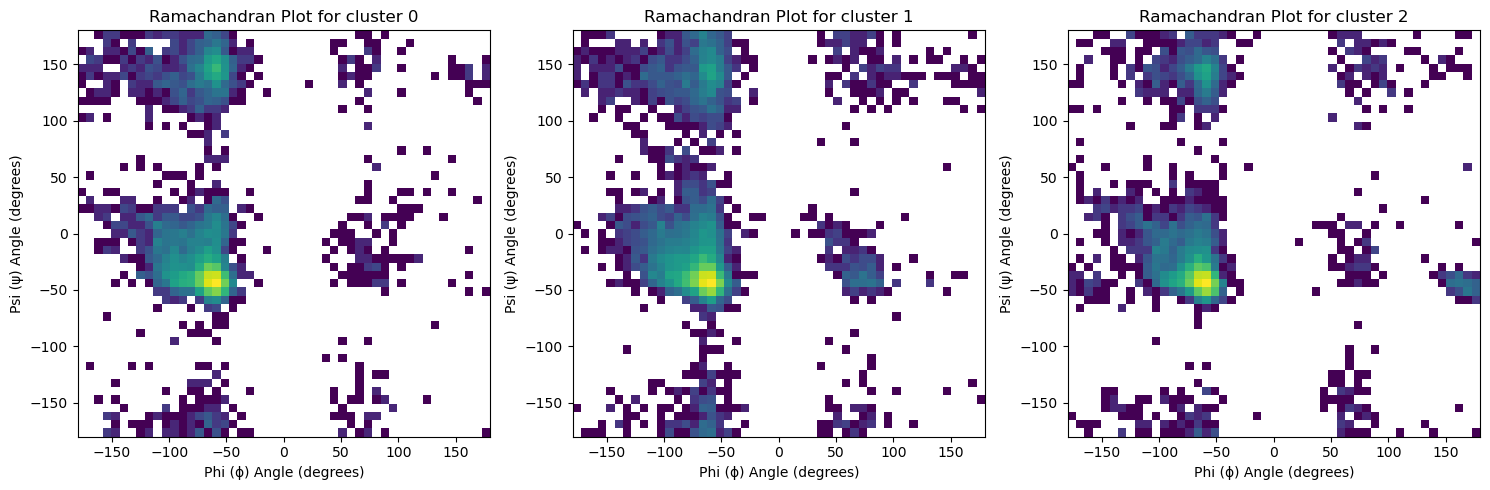

In [6]:

fig, axes = plt.subplots(
    1, num_tsne_clst,
    figsize=(5*num_tsne_clst, 5)
)

rama_linspace = np.linspace(-180, 180, 50)

for clst_i, ax in zip(range(num_tsne_clst), axes.ravel()):

    # Get all the ids of the concatenated ensemble belonging to clst_i.
    cluster_frames_i = reduce_dim.get_clusters_labels(clst_id=clst_i)   # WORK: cluster_frames = np.where(best_kmeans.labels_ == cluster_id)[0]
    
    phi_flat = np.degrees(concat_phi_psi[cluster_frames_i,:,0].ravel())
    psi_flat = np.degrees(concat_phi_psi[cluster_frames_i,:,1].ravel())

    # ax.scatter(phi_flat, psi_flat, alpha=0.5)
    hist = ax.hist2d(
        phi_flat,
        psi_flat,
        cmap="viridis",
        bins=(rama_linspace, rama_linspace), 
        norm=colors.LogNorm(),
        density=True)

    ax.set_title(f'Ramachandran Plot for cluster {clst_i}')
    ax.set_xlabel('Phi (ϕ) Angle (degrees)')
    ax.set_ylabel('Psi (ψ) Angle (degrees)')
    
plt.tight_layout()
plt.show()


Calculating rg for 3a1g_B_prod_R1_fit.
Calculating rg for 3a1g_B_prod_R2_fit.
Calculating rg for 3a1g_B_prod_R3_fit.


/tmp/ipykernel_3477576/2513049095.py:23: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('jet', num_tsne_clst)


Text(0.5, 1.0, 'Density Plot ')

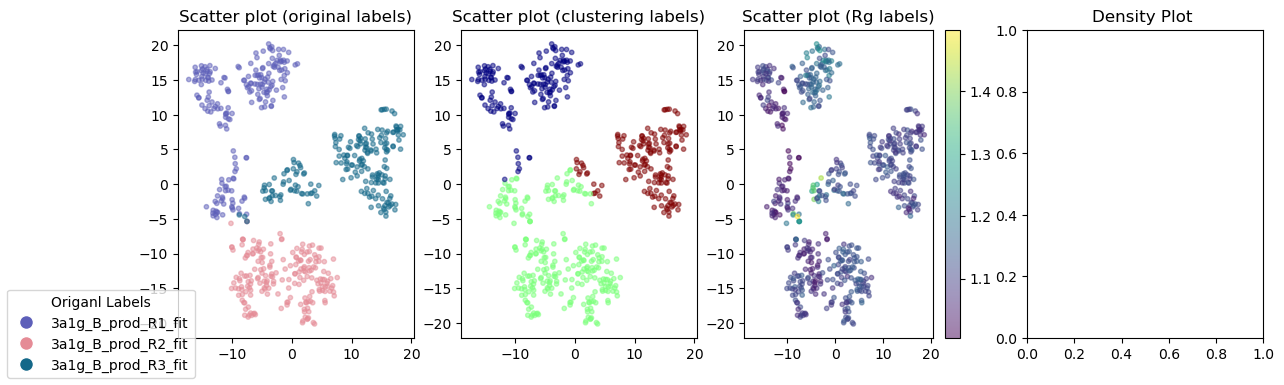

In [7]:
import random

use_sns = False

fig , (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(14 ,4)) 
besttsne = reduce_dim.concat_data
bestclust = reduce_dim.get_clusters_labels()


# scatter original  labels
label_colors = {label: "#{:06x}".format(random.randint(0, 0xFFFFFF)) for label in range(len(pipeline))}
# point_colors = list(map(lambda label: label_colors[label], pipeline.labels))
point_colors = list(map(lambda label: label_colors[label], pipeline.labels))
scatter_labeled = ax1.scatter(besttsne[:, 0], besttsne[:, 1], c=point_colors, s=10, alpha = 0.5)

# scatter Rg labels 
# Rg in nm
concat_rg_data = pipeline.get_rg(codes="all", concat=True)
rg_labeled = ax3.scatter(besttsne[:, 0], besttsne[:, 1], c=concat_rg_data, s=10, alpha=0.5) 
cbar = plt.colorbar(rg_labeled, ax=ax3)

# scatter cluster labels
cmap = cm.get_cmap('jet', num_tsne_clst)
scatter_cluster = ax2.scatter(besttsne[:,0], besttsne[:,1], c=bestclust.astype(float), s=10,cmap=cmap ,alpha=0.5)

# manage legend
legend_labels = pipeline.codes
legend_handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=label_colors[label], markersize=10) for label in range(len(pipeline))]
fig.legend(legend_handles, legend_labels, title='Origanl Labels', loc = 'lower left')

# KDE plot
if use_sns:
    sns.kdeplot(x=besttsne[:, 0], y=besttsne[:, 1], ax=ax4, fill=True, cmap='Blues', levels=5)

# ax1.scatter(grid_positions[0, densest_indices], grid_positions[1, densest_indices], c='red', marker='x', s=50, label='Densest Points')
ax1.set_title('Scatter plot (original labels)')
ax2.set_title('Scatter plot (clustering labels)')
ax3.set_title('Scatter plot (Rg labels)')
ax4.set_title('Density Plot ')